In [1]:
# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine

# Postgres DB connection
from config import postgresqlDB

# engine
engine = create_engine(postgresqlDB)
connection = engine.connect()


In [2]:
# tables to a dataframe
titles    = pd.read_sql("Select * From titles", connection)
employees = pd.read_sql("Select * From employees", connection)
salaries  = pd.read_sql("Select * From salaries", connection)


In [3]:
# get the maximum salary to set the limits of  x values
max_salary =  pd.read_sql("Select max(salary) From salaries", connection)
max_salary


,max
0,129492.0


In [4]:
# get the minimum salary to set the limits of  x values
min_salary =  pd.read_sql("Select min(salary) From salaries", connection)
min_salary


,min
0,40000.0


## Histogram to visualize the most common salary ranges for employees.

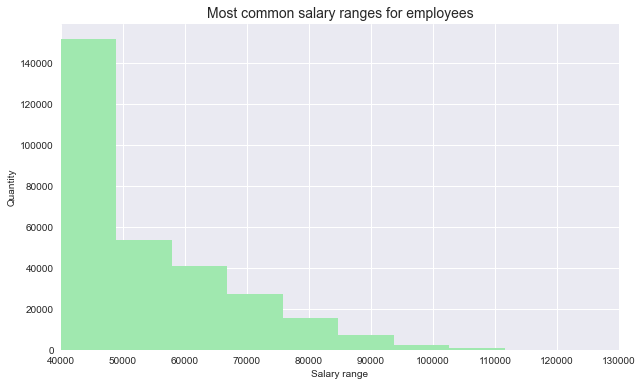

In [6]:
import numpy as np
plt.style.use('seaborn') 
ax = salaries.hist(column='salary', color='#A0E8AF', figsize=[10, 6])

# labels and title
plt.xlabel("Salary range", fontsize=10)
plt.ylabel("Quantity",fontsize=10)
plt.title('Most common salary ranges for employees',fontsize=14)

# limit x values
plt.xlim(40000,130000)

plt.savefig('../sql-challenge/Images/SalaryHist.png')

## Create a Bar chart of average salary by title

In [8]:
# Dataframe of salaries by title
salaries_avg_title = pd.read_sql (  "     Select t.title_description title," 
                                    "            round(avg(s.salary),2) avg_salary "
                                    "       from salaries s"
                                    " inner join employees e on e.emp_id = s.emp_id"
                                    " inner join titles t on t.title_id = emp_title_id"
                                    "   group by 1"
                                    "   order by 2 desc", connection )
# set the index (title)
salaries_avg_title = salaries_avg_title.set_index('title')


In [9]:
# salary by title
salaries_avg_title

,avg_salary
title,
Senior Staff,58550.17
Staff,58465.38
Manager,51531.04
Technique Leader,48582.90
Assistant Engineer,48564.43
Engineer,48535.34
Senior Engineer,48506.80


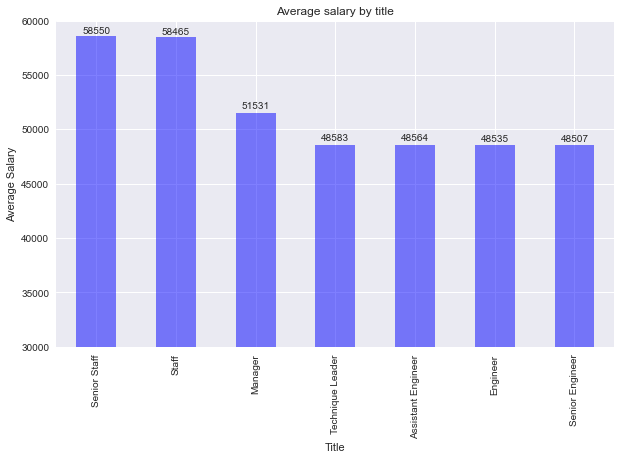

In [11]:
 # Draw a bar chart
plt.style.use('seaborn') 
ax = salaries_avg_title.plot(kind="bar",color = 'blue',alpha=0.5, align="center", legend = False, ylim=(30000,60000),
                             figsize=[10, 6])

# formatted title 
plt.title ('Average salary by title')


for p in ax.patches:
    label_position = p.get_height()/1.01
    
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., label_position), 
                   ha = 'center', va = 'center', 
                   xytext = (0,12),
                   textcoords = 'offset points')
    
plt.ylabel('Average Salary')
plt.xlabel('Title')
plt.savefig('../sql-challenge/Images/AvgSalaryTitle.png')
plt.show()



## Bonus- Chart - Salary ranges for employees 

In [13]:
salaries_count_df = pd.read_sql("select '40k-49k' as range, count(emp_id) from salaries where salary between 40000 and 49999 union "
                               " select '50k-59k' as range, count(emp_id) from salaries where salary between 50000 and 59999 union "
                               " select '60k-69k' as range, count(emp_id) from salaries where salary between 60000 and 69999 union "
                               " select '70k-79k' as range, count(emp_id) from salaries where salary between 70000 and 79999 union "
                               " select '80k-89k' as range, count(emp_id) from salaries where salary between 80000 and 89999 union "
                               " select '90k-99k' as range, count(emp_id) from salaries where salary between 90000 and 99999 union "
                               " select '100k-109k' as range, count(emp_id) from salaries where salary between 100000 and 109999 union "
                               " select '110k-119k' as range, count(emp_id) from salaries where salary between 110000 and 119999 union "
                               " select '120k-130k' as range, count(emp_id) from salaries where salary between 120000 and 130000"
                               " order by 2 desc"
                               , connection)
# set the index (range)
salaries_count_df = salaries_count_df.set_index('range')

In [14]:
salaries_count_df

,count
range,
40k-49k,158465
50k-59k,57915
60k-69k,41413
70k-79k,24814
80k-89k,11845
90k-99k,4284
100k-109k,1069
110k-119k,195
120k-130k,24


In [15]:
# print(plt.style.available)

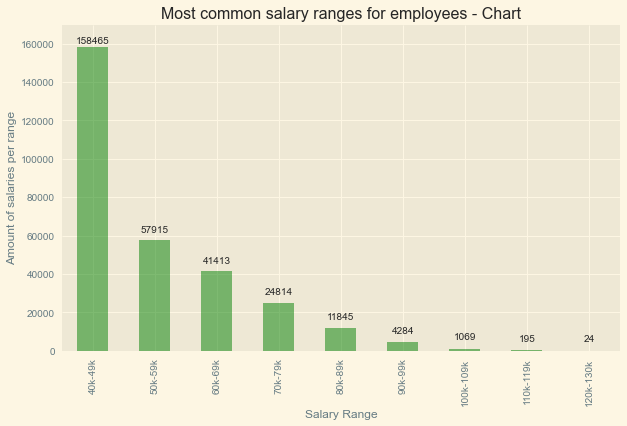

In [18]:
 # Draw a bar chart
ax = salaries_count_df.plot(kind="bar",color = 'green',alpha=0.5, align="center", legend = False,ylim=(0,170000), figsize=[10,6])

plt.style.use('Solarize_Light2')

# formatted title 
plt.title ('Most common salary ranges for employees - Chart')

for p in ax.patches:
    label_position = p.get_height()/1.02
    
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., label_position), 
                   ha = 'center', va = 'center', 
                   xytext = (0,12),
                   textcoords = 'offset points')
plt.ylabel('Amount of salaries per range')
plt.xlabel('Salary Range')
plt.savefig('../sql-challenge/Images/SalaryPerRangeChart.png')
plt.show()


